In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


%matplotlib inline

import seaborn as sns; sns.set()

In [2]:
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

In [ ]:
dataset_train.head()

In [ ]:
print("shape: ")
print(dataset_train.shape)
print("columns:") 
print(dataset_train.columns)

In [3]:
CorrelationMatrix = dataset_train.corr()
CorrelationMatrix["SalePrice"].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [ ]:
fig, ax = plt.subplots(figsize=(25, 25))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(240, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(CorrelationMatrix, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(CorrelationMatrix.columns)), CorrelationMatrix.columns);
#Apply yticks
plt.yticks(range(len(CorrelationMatrix.columns)), CorrelationMatrix.columns)
#show plot
plt.show()

Feature extraction:

From the plot we can see that the most prominent features are (Setting the cutoff points as 0.5 correlation)


OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101


Now we inspect these features seperately 

For categorical values, we plot the boxplots; for Quantitative values, we plot the scatterplots


In [ ]:
# OverallQual
feature = 'OverallQual'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)


In [ ]:
# GrLivArea

feature = 'GrLivArea'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))


In [ ]:
# GarageCars
feature = 'GarageCars'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
plot = sns.boxplot(x=feature, y="SalePrice", data=data)


In [ ]:
# GarageArea

feature = 'GarageArea'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

In [ ]:
# TotalBsmtSF

feature = 'TotalBsmtSF'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

In [ ]:
# 1stFlrSF

feature = '1stFlrSF'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

In [ ]:
# FullBath
feature = 'FullBath'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

In [ ]:
# TotRmsAbvGrd
feature = 'TotRmsAbvGrd'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

In [ ]:
# YearBuilt
feature = 'YearBuilt'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

f, _ = plt.subplots(figsize=(50, 15))

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

In [ ]:
# YearRemodAdd
feature = 'YearRemodAdd'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

f, _ = plt.subplots(figsize=(30, 10))

plot = sns.boxplot(x=feature, y="SalePrice", data=data)


Although SalePrice increases slightly with YearBuilt and YearRemodAdd, they do not exhibit strong relationship with the SalePrice, hence we can exclude them from our model analysis.

Therefore we are left with only 8 features and below is a zoomed version of the plot

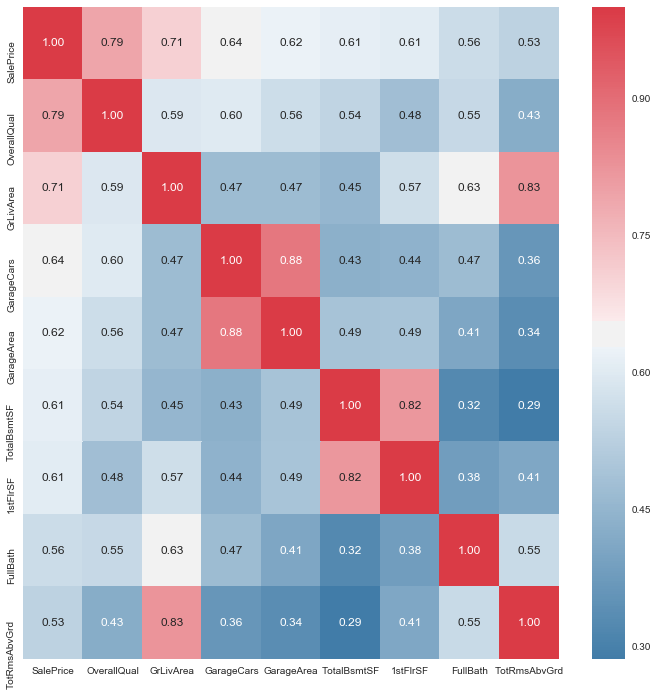

In [4]:
features = CorrelationMatrix.nlargest(9, "SalePrice")["SalePrice"].index
CorrelationMatrices = np.corrcoef(dataset_train[features].values.T)

fig, ax = plt.subplots(figsize=(12, 12))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(240, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(CorrelationMatrices, cmap=colormap, annot=True, fmt=".2f", yticklabels=features.values, xticklabels=features.values)


## From this refined plot, we can see that 

GrLivArea correlates with TotRmsAbvGrd; GarageCars correlates with GarageArea, and TotalBsmtSF correlates with 1stFlrSF

Now we check for the homoscedasticity assumptions for the quantitive variables.


Before that, we need to check if there are any missing values in our features.

In [ ]:
dataset_train.isnull().sum().sort_values(ascending=False)

it loosk like all the our selected features do not suffer from missing value concerns, so we can proceed to examine the distribution of quantitive variables.

In [ ]:
dataset_train['SalePrice'].describe()

In [ ]:
print("Skewness: %f" % dataset_train['SalePrice'].skew())
print("Kurtosis: %f" % dataset_train['SalePrice'].kurt())

In [ ]:
sns.distplot(dataset_train['SalePrice'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['SalePrice'], plot=plt)


It doesn't look normal, we need to do somet transformation

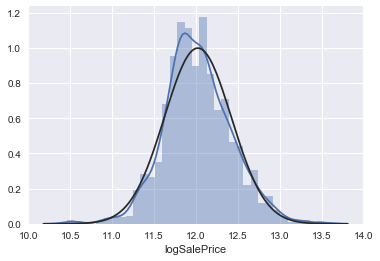

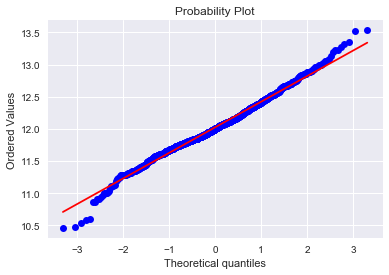

In [5]:
dataset_train['logSalePrice'] = np.log(dataset_train['SalePrice'])

sns.distplot(dataset_train['logSalePrice'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(dataset_train['logSalePrice'], plot=plt)

Looks better now
Let's inspect the rest of the quantitative variables
    GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF

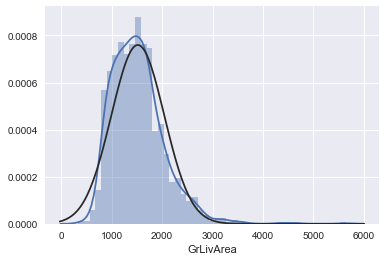

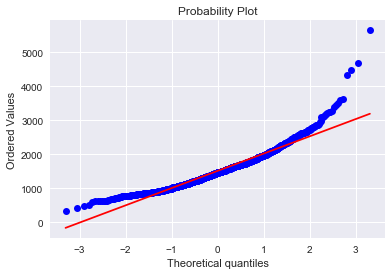

In [6]:
sns.distplot(dataset_train['GrLivArea'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['GrLivArea'], plot=plt)


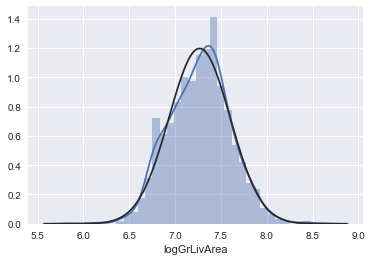

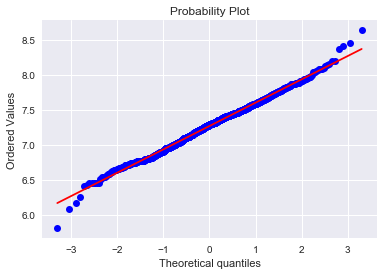

In [7]:
dataset_train['logGrLivArea'] = np.log(dataset_train['GrLivArea'])

sns.distplot(dataset_train['logGrLivArea'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset_train['logGrLivArea'], plot=plt)

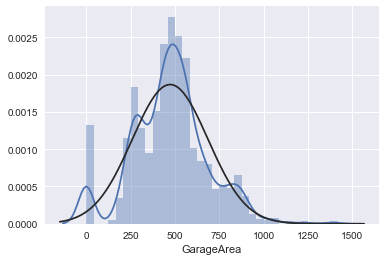

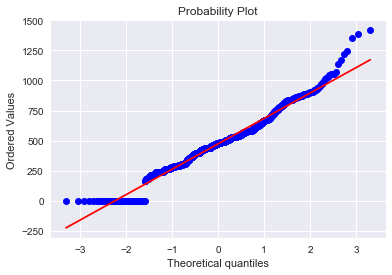

In [8]:
sns.distplot(dataset_train['GarageArea'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['GarageArea'], plot=plt)


Mostly normal, except for some the outliers 

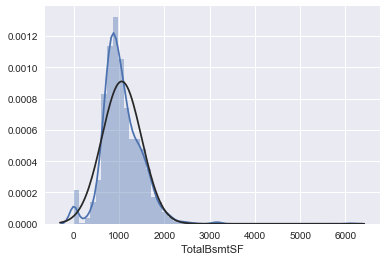

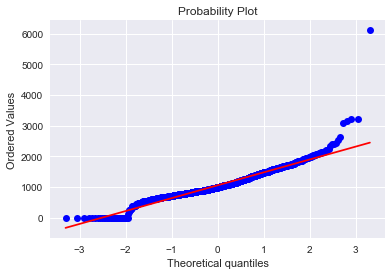

In [9]:
sns.distplot(dataset_train['TotalBsmtSF'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['TotalBsmtSF'], plot=plt)


For TotalBsmtSF, since there are some 0 values, it is important to treat them differently in the log transformation. 

/Users/petershi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


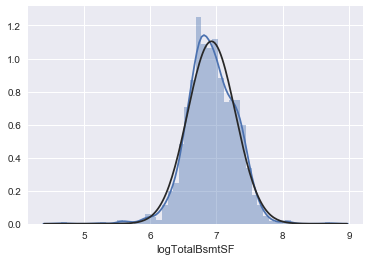

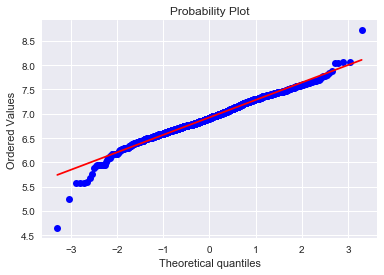

In [10]:
dataset_train['logTotalBsmtSF'] = 0 
dataset_train.loc[dataset_train['TotalBsmtSF']>0,'logTotalBsmtSF'] = np.log(dataset_train['TotalBsmtSF'])


sns.distplot(dataset_train[dataset_train['TotalBsmtSF']>0]['logTotalBsmtSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset_train[dataset_train['TotalBsmtSF']>0]['logTotalBsmtSF'], plot=plt)



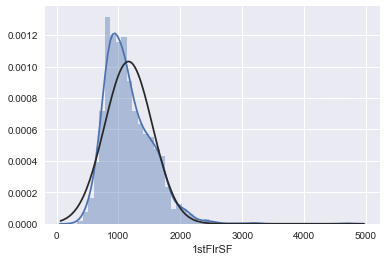

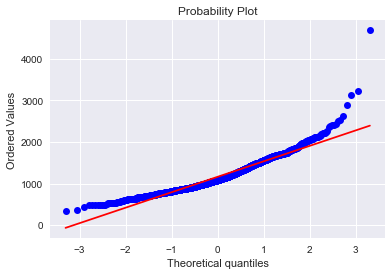

In [11]:
sns.distplot(dataset_train['1stFlrSF'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['1stFlrSF'], plot=plt)

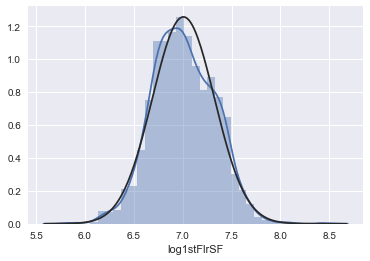

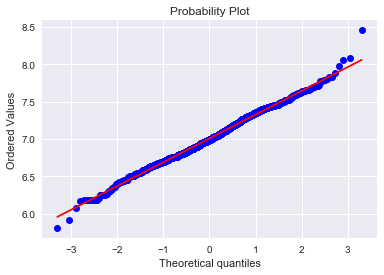

In [12]:
dataset_train['log1stFlrSF'] = np.log(dataset_train['1stFlrSF'])

sns.distplot(dataset_train['log1stFlrSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset_train['log1stFlrSF'], plot=plt)

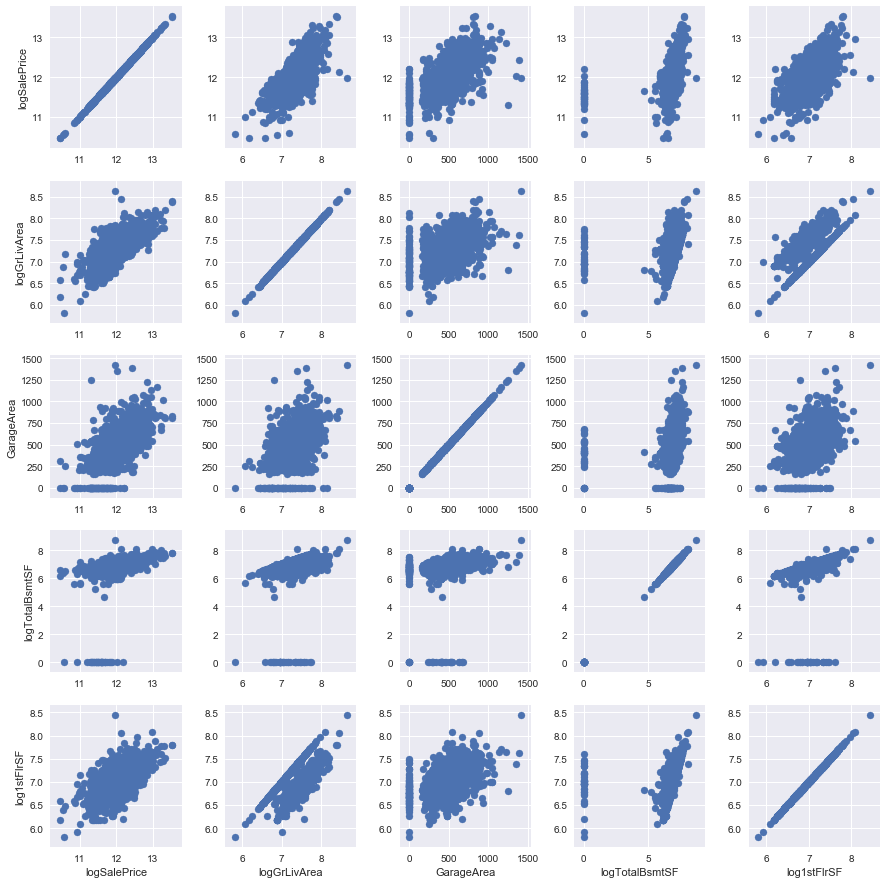

In [13]:
quantatitive_variables = ['logSalePrice', 'logGrLivArea', 'GarageArea', 'logTotalBsmtSF', 'log1stFlrSF']

plot = sns.PairGrid(dataset_train[quantatitive_variables])

plot = plot.map(plt.scatter)


From the plot, we can see that homoscedasticity is fulfilled, if we take out the 0 values from the plot. 

## Model Training

In [16]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


variables = ['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'logGrLivArea', 'GarageArea', 'logTotalBsmtSF', 'log1stFlrSF']

df_new = pd.get_dummies(dataset_train[variables], columns=['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd'], drop_first=True)

X = df_new.values
y = dataset_train['logSalePrice'].values

sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)

y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 0)

MSE for Linear Regression is: 44251.0522535
MSE for Bayesian Ridge is: 45166.7005368
MSE for Supoort Vector Regression is: 38827.744048
MSE for Decision Tree Regressor is: 47696.4678138
MSE for Random Forest Regressor is: 34086.59746


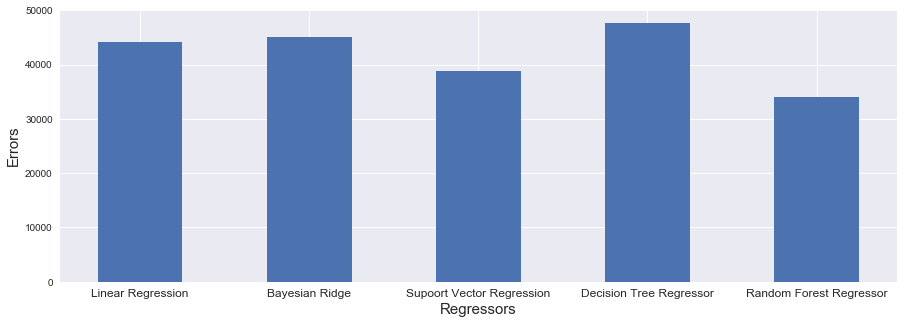

In [17]:
regressors = {
        'Linear Regression': LinearRegression(),
        'Bayesian Ridge': BayesianRidge(),
        'Supoort Vector Regression': SVR(),
        'Decision Tree Regressor': DecisionTreeRegressor(), 
        'Random Forest Regressor':RandomForestRegressor(n_estimators = 300, random_state = 3)
       }

errors = []

for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    error = np.sqrt(metrics.mean_squared_error(np.exp(sc_y.inverse_transform(y_test)), np.exp(sc_y.inverse_transform(y_pred))))
    print("MSE for " + name + " is: " + str(error))
    errors.append(error)


x_pos = [i for i, _ in enumerate(regressors.keys())]

plt.figure(figsize=(15, 5))
plt.bar(x_pos, errors, width=0.5)
plt.xlabel("Regressors", fontsize=15)
plt.ylabel("Errors", fontsize=15)
plt.xticks(x_pos, regressors.keys(), fontsize=12)
plt.show()


We can see that our Random Forest Regressor has the best performance.

In [29]:
dataset_test[features[1:]].isnull().sum()


OverallQual     0
GrLivArea       0
GarageCars      1
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
dtype: int64

In [36]:
dataset_test[dataset_test[features[1:]].isnull().any(axis=1)][features[1:]]

# dataset_test['GarageCars'].isnull()


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
660,4,896,1.0,280.0,NaN,896,1,4
1116,5,1828,NaN,NaN,859.0,942,2,6


In [37]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

# imputer = imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])

In [41]:
imputer.fit(dataset_test[features[1:]]).transform(dataset_test[features[1:]])

array([[  5.00000000e+00,   8.96000000e+02,   1.00000000e+00, ...,
          8.96000000e+02,   1.00000000e+00,   5.00000000e+00],
       [  6.00000000e+00,   1.32900000e+03,   1.00000000e+00, ...,
          1.32900000e+03,   1.00000000e+00,   6.00000000e+00],
       [  5.00000000e+00,   1.62900000e+03,   2.00000000e+00, ...,
          9.28000000e+02,   2.00000000e+00,   6.00000000e+00],
       ..., 
       [  5.00000000e+00,   1.22400000e+03,   2.00000000e+00, ...,
          1.22400000e+03,   1.00000000e+00,   7.00000000e+00],
       [  5.00000000e+00,   9.70000000e+02,   0.00000000e+00, ...,
          9.70000000e+02,   1.00000000e+00,   6.00000000e+00],
       [  7.00000000e+00,   2.00000000e+03,   3.00000000e+00, ...,
          9.96000000e+02,   2.00000000e+00,   9.00000000e+00]])

In [ ]:
dataset_train['logSalePrice'] = np.log(dataset_train['SalePrice'])
dataset_train['logGrLivArea'] = np.log(dataset_train['GrLivArea'])
dataset_train.loc[dataset_train['TotalBsmtSF']>0,'logTotalBsmtSF'] = np.log(dataset_train['TotalBsmtSF'])
dataset_train['log1stFlrSF'] = np.log(dataset_train['1stFlrSF'])
